<h1>EDA</h1>

1.  **Data Inspection and Structure:**
    * Load the dataset and check its dimensions (rows, columns).
    * Examine the first few rows (`df.head()`).
    * Verify column names and data types (`df.info()`).

2.  **Missing Value Analysis:**
    * Calculate the count and **percentage of missing values** for every column.
    * Decide on a handling strategy (imputation, creation of 'Missing' category, or dropping the column).

3.  **Data Cleaning:**
    * Identify and remove **duplicate rows**.
    * Address data type inconsistencies (e.g., converting 'object' dates to `datetime`).

4.  **Univariate Analysis (Single Features):**
    * **Numerical:** Compute descriptive statistics (`df.describe()`). Visualize distributions using **Histograms** or KDE plots to check for **skewness**. Use **Box Plots** to detect **outliers**.
    * **Categorical:** Compute frequency counts (`value_counts()`). Visualize with **Bar Charts** and check for **imbalance** and **high cardinality**.

5.  **Bivariate and Multivariate Analysis (Relationships):**
    * **Numerical-Numerical:** Calculate and visualize the **Correlation Matrix** using a **Heatmap** to identify multicollinearity.
    * **Categorical-Numerical (Target):** Use **Box Plots** or **ANOVA** to assess how the numerical target's distribution changes across categories.
    * **Feature-Target Correlation:** Analyze how each feature relates to the target variable $Y$.

6.  **Feature Engineering and Transformation Decisions:**
    * Apply domain knowledge to **create new features** or combine existing ones.
    * Decide on the final plan for **Imputation** (median/mode), **Encoding** (One-Hot/Ordinal), and **Scaling** (Standard/MinMax) based on the findings, typically set up in a `ColumnTransformer`.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy.stats import f_oneway

In [2]:
df = pd.read_csv('AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [4]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


1.7435000757376466


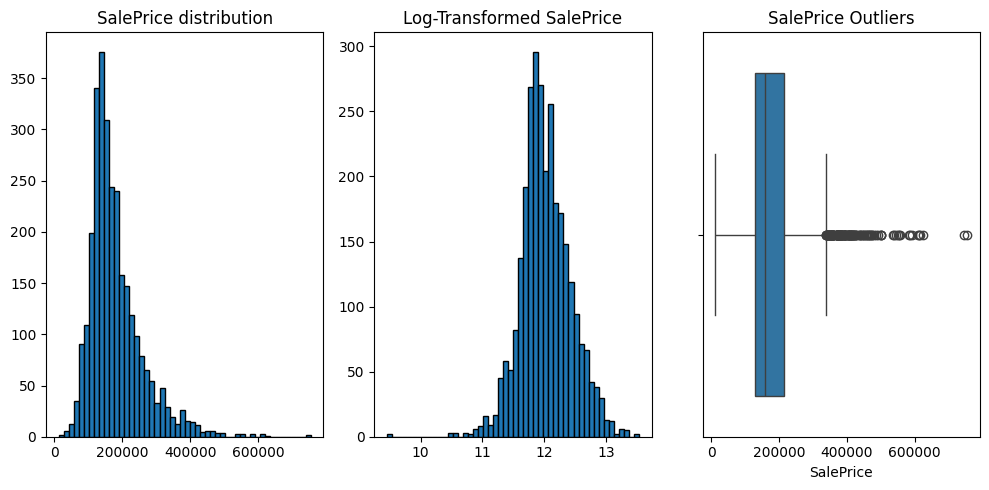

SalePrice Skewness: 1.74


In [5]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.hist(df['SalePrice'], bins = 50, edgecolor='black')
plt.title('SalePrice distribution')


skew_sale_price = df['SalePrice'].skew()
print(skew_sale_price)

plt.subplot(1,3,2)
plt.hist(np.log1p(df['SalePrice']), bins=50, edgecolor='black')
plt.title('Log-Transformed SalePrice')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['SalePrice'])
plt.title('SalePrice Outliers')

plt.tight_layout()
plt.show()

print(f"SalePrice Skewness: {skew_sale_price:.2f}")

In [6]:
miss_value = pd.concat([
    df.isnull().sum()
    ,df.count()
    ,(df.isnull().sum() * 100 / len(df)).round(2)
],
axis=1,keys=["Missing Values","Present Values","Percent Missing values"]).sort_values(by="Percent Missing values",ascending=False)
miss_value

,Missing Values,Present Values,Percent Missing values
Pool QC,2917,13,99.56
Misc Feature,2824,106,96.38
Alley,2732,198,93.24
Fence,2358,572,80.48
Mas Vnr Type,1775,1155,60.58
...,...,...,...
Mo Sold,0,2930,0.00
Yr Sold,0,2930,0.00
Sale Type,0,2930,0.00
Sale Condition,0,2930,0.00


In [7]:
df = df.drop(["Pool QC","Misc Feature","Alley","Fence","Mas Vnr Type","Fireplace Qu"],axis=1)
df.drop_duplicates(keep="first",inplace=True)

In [8]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [ ]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    if df[col].isnull().all():
        print(f"Skipping {col}: All values are NaN")
    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)
    data_clean = df[col].dropna()

    skew_data = data_clean.skew()
    plt.hist(data_clean,bins=50,edgecolor='black',alpha=0.7)
    plt.title(f"Histogram of {col}(Skew:{skew_data:.2f})")
    plt.xlabel(col)

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (Outliers)')
    plt.xlabel(col)

    plt

    plt.tight_layout()
    plt.show()

In [10]:
SKEW_THRESHOLD = 1.0

transform_candidate=[]

for col in numeric_cols:
    if (df[col] < 0).any():
        print(f"Skipping {col}: Contains negative values.")
        continue
    skew = df[col].dropna().skew()

    if skew >= SKEW_THRESHOLD:
        transform_candidate.append(col)

for col in transform_candidate:
    df[col] = np.log1p(df[col]) 

In [ ]:
categorical_cols = df.select_dtypes(['object']).columns

CRITICAL_IMBALANCE_THRESHOLD = 0.95
WARNING_IMBALANCE_THRESHOLD = 0.80
CARDINALITY_THRESHOLD = 50
delete_imbalanced_list = []
imbalanced_list = []

for col in categorical_cols:
    counts = df[col].value_counts(normalize=True) * 100

    unique = df[col].nunique()
    if unique > CARDINALITY_THRESHOLD:
        print(f"High CArdinality: {unique}")
        plot_data = counts.head(10)
    else:
        plot_data = counts
    
    max_prop = counts.max() / 100
    if max_prop >= CRITICAL_IMBALANCE_THRESHOLD:
        delete_imbalanced_list.append(col)
        print(f"Imbalance Detected for {col} ({counts.index[0]}) accounts for {max_prop:.2%} of the data")

    if WARNING_IMBALANCE_THRESHOLD <= max_prop < CRITICAL_IMBALANCE_THRESHOLD:
        imbalanced_list.append(col)
        print(f"Imbalance Detected for {col} ({counts.index[0]}) accounts for {max_prop:.2%} of the data")

    plt.figure(figsize=(4,5))

    sns.barplot(x=plot_data,y=plot_data.values, color='skyblue')

    plt.title(f'Bar Chart of {col}')
    plt.ylabel(f'Percentage (%)')
    plt.xlabel(col)

    plt.xticks(rotation=45,ha='right')
    plt.tight_layout()
    plt.show()

print("\n--- Summary ---")
print("Columns with critical imbalance (>= 95%):", delete_imbalanced_list)
print("Columns with extreme imbalance (>= 80%):", imbalanced_list)

for col in delete_imbalanced_list:
    df = df.drop(col,axis=1)

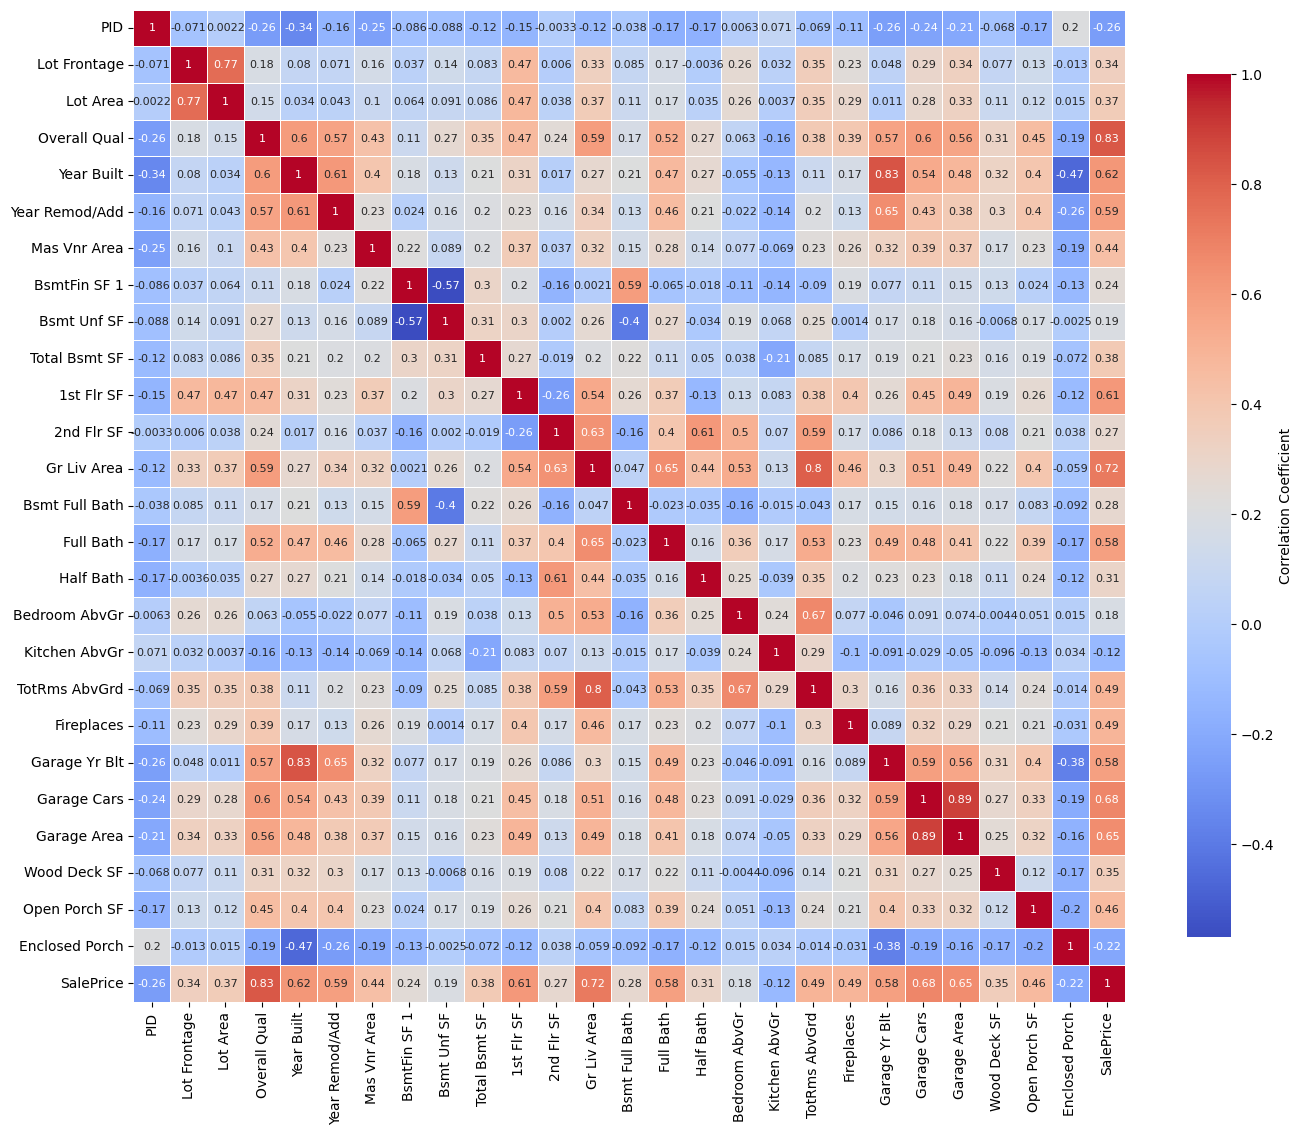

In [ ]:
num_corr = df.corr(numeric_only=True)

plt.figure(figsize=(16,14))
sns.heatmap(num_corr, 
            cmap='coolwarm',  
            center=0, 
            annot=True,  
            fmt='.2f', 
            square=True,  
            linewidths=0.5,
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
            annot_kws={"size": 8}) 
plt.show()

In [13]:


MIN_SAMPLES = 5

num_corr = df.corr(numeric_only=True)['SalePrice'].dropna().abs().sort_values(ascending=False)
num_corr_df = pd.DataFrame({'Feature': num_corr.index,
                            'Correlation' : num_corr.values,
                            'Type' : 'Numerical'
                            })
anova_res = []
for col in categorical_cols:
    if col not in df.columns:
        continue
    counts = df[col].value_counts()
    valid_cats = counts[counts >= MIN_SAMPLES].index
    if len(valid_cats) < 2:
        continue
    groups = [
        df.loc[df[col] == cat, 'SalePrice'].dropna()
        for cat in valid_cats
    ]
    if any(len(g) < 2 for g in groups):
        continue
    f_stat, _ = f_oneway(*groups)
    anova_res.append({'Feature': col, 'Correlation': f_stat, 'Type': 'Categorical'})

cat_corr_df = pd.DataFrame(anova_res)
combined_corr_df = pd.concat([num_corr_df, cat_corr_df], ignore_index=True).sort_values(by='Correlation', ascending=False)
print("Top Feature-Target Relationships (Numerical: Pearson Correlation, Categorical: ANOVA F-Statistic):")
combined_corr_df.head(20) 

Top Feature-Target Relationships (Numerical: Pearson Correlation, Categorical: ANOVA F-Statistic):


,Feature,Correlation,Type
50,Exter Qual,862.193894,Categorical
53,Bsmt Qual,861.172244,Categorical
61,Kitchen Qual,787.989806,Categorical
64,Garage Finish,643.065868,Categorical
59,Central Air,464.894244,Categorical
58,Heating QC,320.612426,Categorical
52,Foundation,276.379524,Categorical
66,Paved Drive,233.405334,Categorical
63,Garage Type,201.958988,Categorical
43,Neighborhood,161.613561,Categorical


In [14]:
NUM_THRESHOLD = 0.1
CAT_THRESHOLD = 10

weak_features = combined_corr_df[
    ((combined_corr_df['Type'] == 'Numerical') & (combined_corr_df['Correlation'] < NUM_THRESHOLD)) |
    ((combined_corr_df['Type'] == 'Categorical') & (combined_corr_df['Correlation'] < CAT_THRESHOLD))
]['Feature'].tolist()

print(f"Weak features to drop ({len(weak_features)}): {weak_features}")

df = df.drop(columns=[col for col in weak_features if col in df.columns],errors='ignore')

print(f"DataFrame shape after dropping: {df.shape}")

Weak features to drop (13): ['BsmtFin Type 2', 'Screen Porch', 'Low Qual Fin SF', 'Pool Area', 'Misc Val', 'Overall Cond', '3Ssn Porch', 'Mo Sold', 'Yr Sold', 'Order', 'MS SubClass', 'Bsmt Half Bath', 'BsmtFin SF 2']
DataFrame shape after dropping: (2930, 56)


In [15]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

num_cols = X.select_dtypes(['number']).columns
cat_cols = X.select_dtypes(['object']).columns

num_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore',drop='first')) 
])

preprocessor = ColumnTransformer(
    [
        ('num', num_preprocessor, num_cols),
        ('cat', cat_preprocessor, cat_cols)
    ],
    remainder='drop'
)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test) 

d:\Projects\EDA\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [9, 10, 21, 27] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
